In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# missinnoのインストール
#!pip install missingno

# 【問題１】データセットの取得

In [66]:
df = pd.read_csv('C:/Users/miyas/kaggle/train.csv')

# 【問題2】データセット自体の調査
* SalePriceが目的変数で，これを予測する．
* 説明変数には，屋根の種類やキッチン，寝室の数，駅までの距離などがある

# 【問題3】データの確認

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

* 目的変数は80列目にあるSalePrice
* 特徴量は数値とオブジェクトの両方がある

In [68]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応

In [69]:
# 欠損値の確認
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

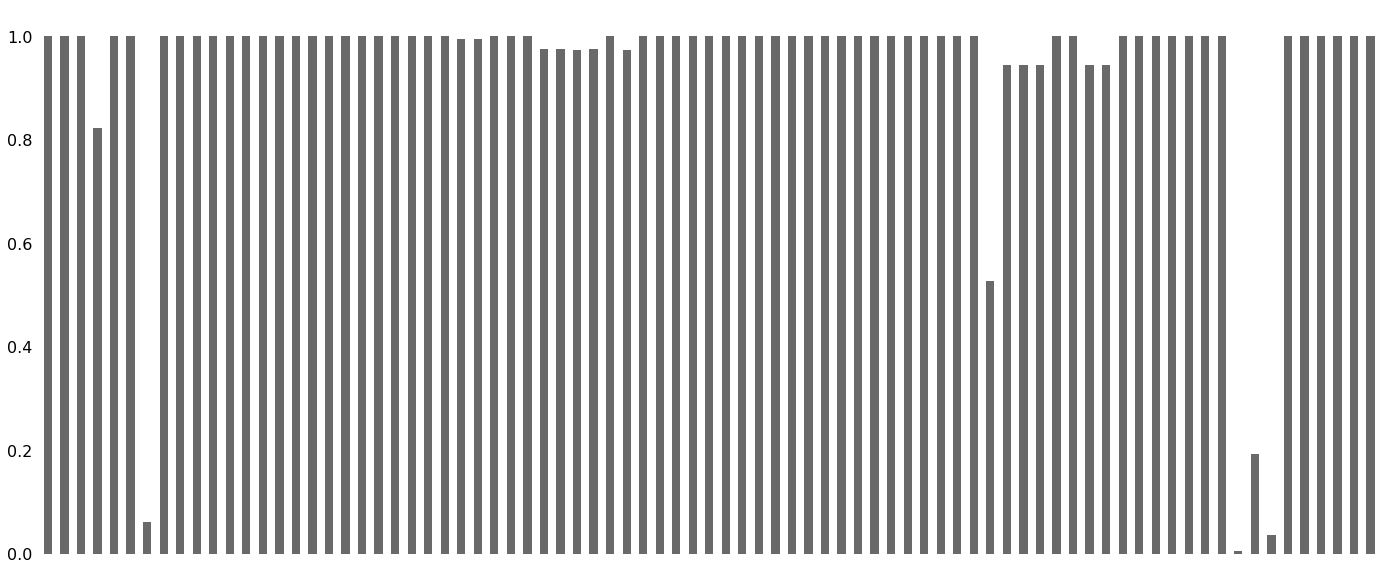

In [70]:
# 欠損値の可視化
# missingnoのインポート
import missingno as msno
msno.bar(df)

In [71]:
# 5つ以上欠損値がある特徴量を削除
df2 = df.dropna(thresh=1455,axis=1)

In [91]:
# 欠損値がある行の削除
df2 = df2.dropna(how='any')

# 【問題5】用語の調査
## １．尖度（せんど）
* 分布が**正規分布からどれだけ尖っているか**を表す統計量．
* 山の尖り度と裾の広がり度を示す．
* 正規分布より**尖った分布**（データが平均付近に集中し,分布の裾が重い）のときには**正の値**をとる．
* 正規分布より**扁平な分布**（データが平均付近から散らばり,分布の裾が軽い）のときには**負の値**をとる．
* **正規分布の場合には0**になる．

## ２．歪度（わいど）
* 分布が**正規分布からどれだけ歪んでいるか**を表す統計量で，**左右対称性**を示す指標のこと．
* 「右裾が長い」「右に歪んだ」「左に偏った」分布のときには正の値をとる．
* 「左裾が長い」「左に歪んだ」「右に偏った」分布のときには負の値をとる．
* **左右対称の分布**（例えば正規分布）の場合には**0**になる．

> https://bellcurve.jp/statistics/course/17950.html

# 【問題6】分布の確認

### １．sns.distplot()を使い,目的変数の分布を表示し,尖度と歪度も算出

C:\Users\miyas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


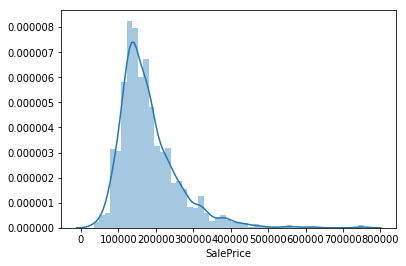

In [93]:
sns.distplot(df2.SalePrice)

In [101]:
print('歪度（Skewness）：',df2.SalePrice.skew())
print('尖度（Kurtosis）：',df2.SalePrice.kurt())

歪度（Skewness）： 1.8819429948035529
尖度（Kurtosis）： 6.529263049673958


### ２．目的変数を対数変換

In [110]:
# 底をeとして対数変換
SalePrice_log = np.log(df2.SalePrice)

### ３．対数変換したものに対して分布を表示し，尖度と歪度を算出

C:\Users\miyas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


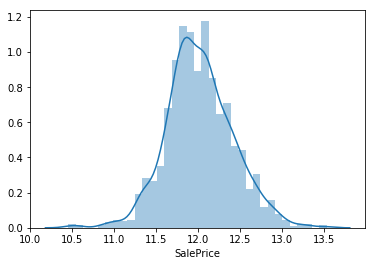

In [108]:
sns.distplot(SalePrice_log)

In [109]:
print('歪度（Skewness）：',SalePrice_log.skew())
print('尖度（Kurtosis）：',SalePrice_log.kurt())

歪度（Skewness）： 0.12131775882415026
尖度（Kurtosis）： 0.806927847502148


対数変換したことによって，目的変数が正規分布に近くなった．

# 【問題7】相関係数の確認

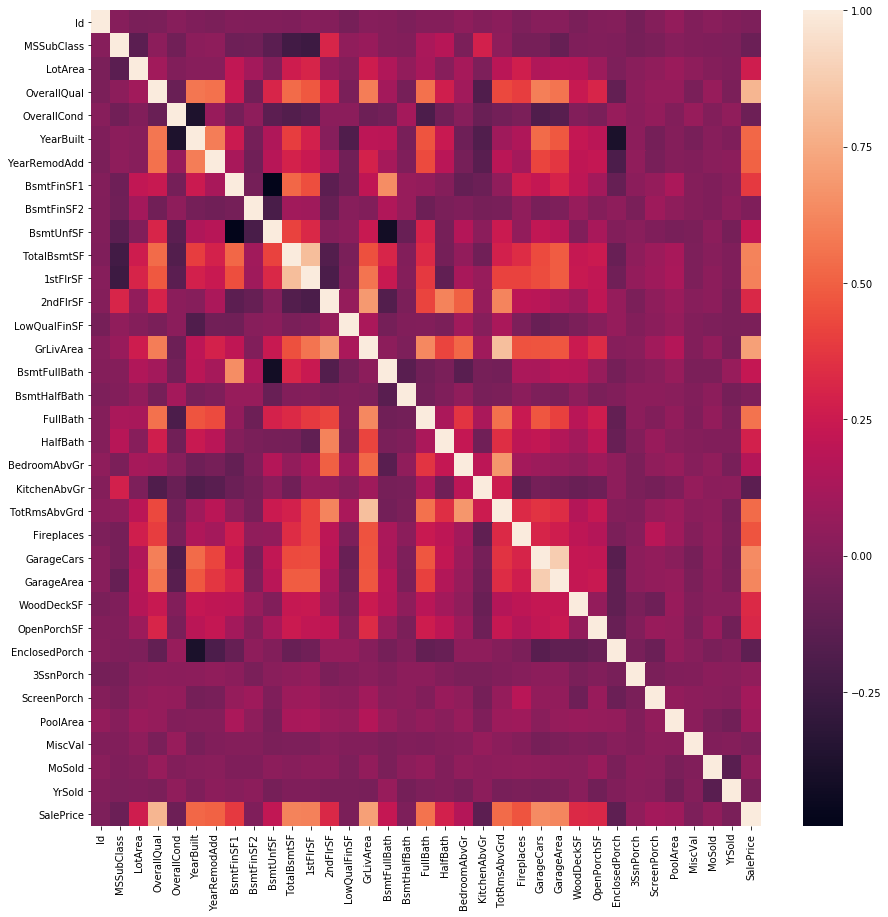

In [118]:
corr_mat = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat)